In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from zipfile import ZipFile
from urllib.request import urlretrieve
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [ ]:
urlretrieve(url="https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip",
            filename="/tmp/cats_and_dogs.zip")

('/tmp/cats_and_dogs.zip', <http.client.HTTPMessage at 0x7f561e283610>)

In [ ]:
with ZipFile("/tmp/cats_and_dogs.zip", "r") as zipy:
  zipy.extractall(path="/tmp/")

zipy.close()

In [ ]:
train_generator = ImageDataGenerator(rescale=1.0/255,
                                     rotation_range=40,
                                     shear_range=0.1,
                                     zoom_range=0.3,
                                     horizontal_flip=True,
                                     fill_mode="nearest")

test_generator = ImageDataGenerator(rescale=1.0/255)

In [ ]:
train_data = train_generator.flow_from_directory("/tmp/cats_and_dogs_filtered/train",
                                         batch_size=20,
                                         target_size=(150, 150),
                                         class_mode="binary")

test_data = test_generator.flow_from_directory("/tmp/cats_and_dogs_filtered/validation/",
                                          batch_size=20,
                                          target_size=(150, 150),
                                          class_mode="binary")

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
model = Sequential()

model.add(layers.Conv2D(16, kernel_size=3, activation="relu", input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(32, kernel_size=3, activation="relu"))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(64, kernel_size=3, activation="relu"))
model.add(layers.MaxPooling2D())
model.add(layers.Flatten())
model.add(layers.Dense(180, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
class stopTraining(Callback):
  def on_epoch_end(self, epoch, log={}):
    if log["accuracy"] > 0.98:
      self.model.stop_training = True

stopCallback = stopTraining()

In [ ]:
history = model.fit(train_data, epochs=30, validation_data=test_data, verbose=1)

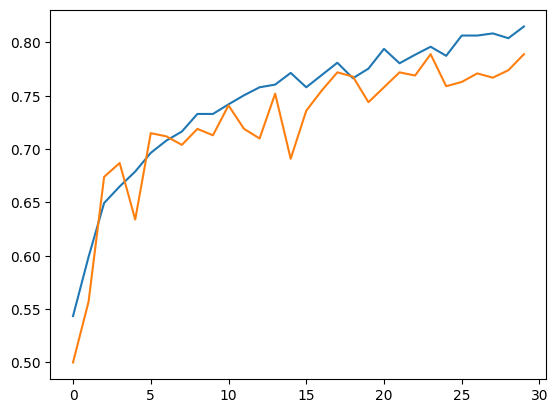

In [ ]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

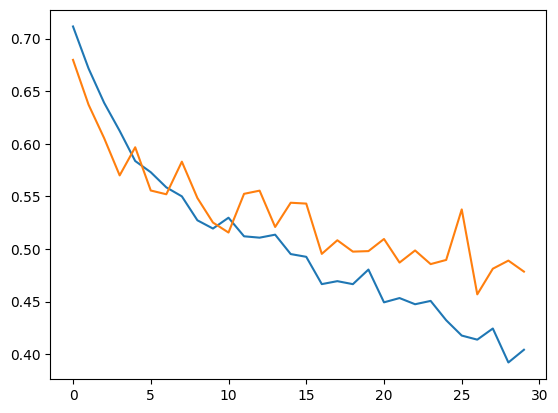

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

### **Tansfer learning with inception**

In [ ]:
inception = InceptionV3(include_top=False, weights="imagenet", input_shape=(150, 150, 3))

87910968/87910968 [==============================] - 5s 0us/step


In [ ]:
inception.trainable = False

last_layer = inception.get_layer("mixed10")
last_layer_output = last_layer.output

x = layers.Flatten()(last_layer_output)
x = layers.Dense(512, activation="relu")(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(256, activation="relu")(x)
output = layers.Dense(1, activation="sigmoid")(x)

In [ ]:
model = Model(inception.input, output)
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
history = model.fit(train_data, epochs=30, validation_data=test_data, verbose=1)

Epoch 1/30
100/100 [==============================] - 34s 210ms/step - loss: 5.7163 - accuracy: 0.8125 - val_loss: 0.4374 - val_accuracy: 0.8260
Epoch 2/30
100/100 [==============================] - 22s 216ms/step - loss: 0.3727 - accuracy: 0.8800 - val_loss: 0.1056 - val_accuracy: 0.9590
Epoch 3/30
100/100 [==============================] - 21s 207ms/step - loss: 0.3440 - accuracy: 0.8980 - val_loss: 0.2051 - val_accuracy: 0.9300
Epoch 4/30
100/100 [==============================] - 21s 209ms/step - loss: 0.2894 - accuracy: 0.9100 - val_loss: 0.1608 - val_accuracy: 0.9450
Epoch 5/30
100/100 [==============================] - 21s 211ms/step - loss: 0.2198 - accuracy: 0.9270 - val_loss: 0.2695 - val_accuracy: 0.9370
Epoch 6/30
100/100 [==============================] - 20s 205ms/step - loss: 0.2039 - accuracy: 0.9195 - val_loss: 0.1293 - val_accuracy: 0.9510
Epoch 7/30
100/100 [==============================] - 21s 209ms/step - loss: 0.2000 - accuracy: 0.9240 - val_loss: 0.2391 - val_ac

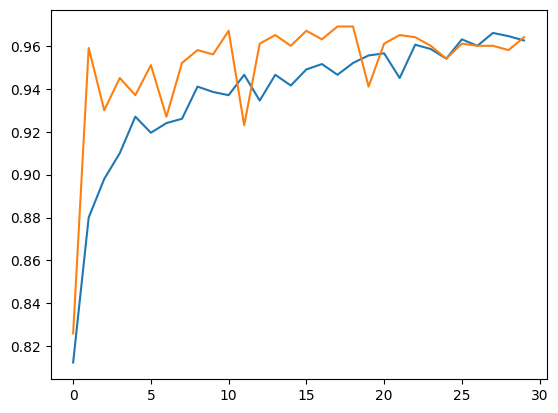

In [ ]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
